目標: 了解利用 PANDAS 整理資料, 利用資料視覺化可以很快的判斷結果

重點: 資料整理與視覺化可以加速理解機器學習

#### 載入資料後的前處理

In [1]:
# 導入相關的庫
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [39]:
# 導入數據集
df_white = pd.read_csv("winequality_white.csv", sep = ',')
df_red = pd.read_csv("winequality_red.csv", sep = ',')

In [40]:
# 檢查數據
# df_white.info(),df_red.info()
df_white.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [41]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# 檢查重複數據
df_white.duplicated().sum(),df_red.duplicated().sum()

(937, 240)

In [43]:
# 移除重複列
df_white.drop_duplicates(inplace = True)
df_red.drop_duplicates(inplace = True)

In [44]:
# 檢查遺失值
df_red.isnull().sum().sum(), df_white.isnull().sum().sum()

(0, 0)

In [45]:
# 做合併
df_wine = df_red.append(df_white)
df_wine.to_csv('winequality.csv', index=False)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### 開始作圖 (視覺化)

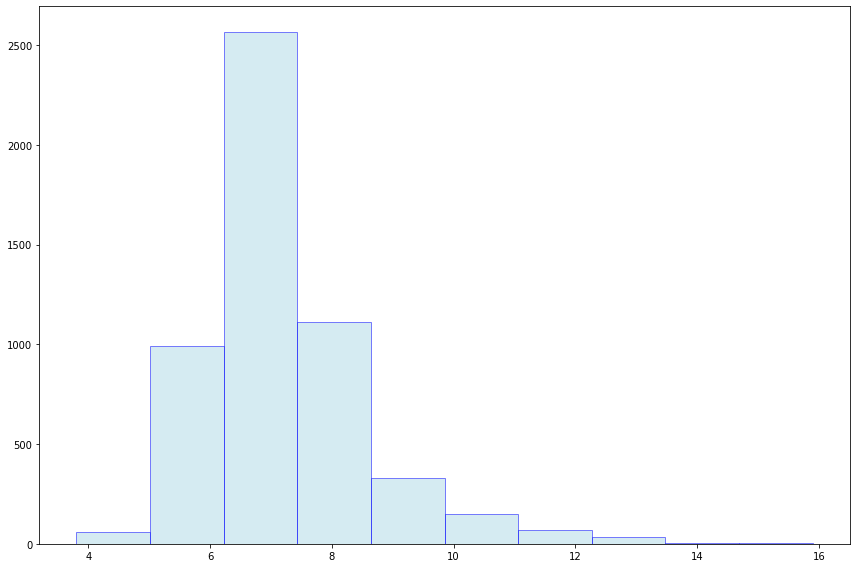

In [48]:
# 直方圖 (資料科學學習手冊 p254)

data = df_wine['fixed acidity']
data
plt.hist(data, bins=10, color='lightblue',edgecolor='blue', alpha=0.5)


# arr: 需要計算直方圖的一維數組； 
# bins: 直方圖的柱數，可選項，默認為10； 
# density: : 是否將得到的直方圖向量歸一化。默認為0； 
# color：顏色序列，默認為None； 
# facecolor: 直方圖顏色； 
# edgecolor: 直方圖邊框顏色； 
# alpha: 透明度； 
# histtype: 直方圖類型，『bar』, 『barstacked』, 『step』, 『stepfilled』；

plt.tight_layout(rect=(1,1,3,3))

熱圖是數據的二-D可視化,其中兩個要素之間的關係量級由色調表示。熱圖中的梯度根據屬性之間的相關性強度而變化。在下面的示例中,高度相關的屬性的陰影比其餘屬性暗。

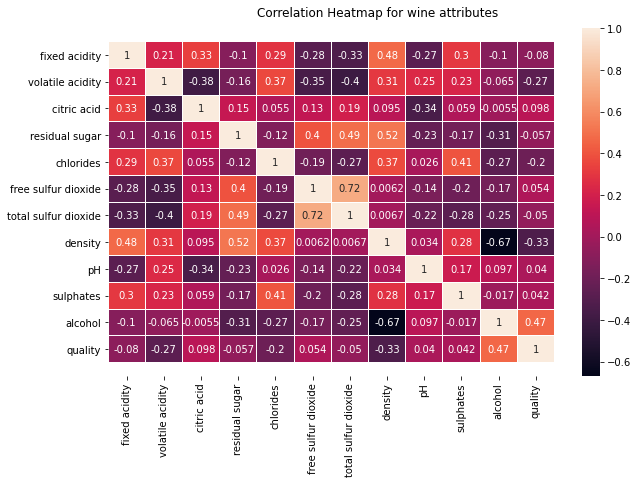

In [69]:
# 熱力圖

# 建立子圖
f, ax = plt.subplots(figsize=(10, 6))
# 等同於
# fig = plt.figure()
# ax = plt.subplot(111)
b = sns.heatmap(df_wine.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)



In [ ]:
Parameters
datarectangular dataset
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

vmin, vmaxfloats, optional
Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

cmapmatplotlib colormap name or object, or list of colors, optional
The mapping from data values to color space. If not provided, the default will depend on whether center is set.

centerfloat, optional
The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

robustbool, optional
If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.

annotbool or rectangular dataset, optional
If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

fmtstr, optional
String formatting code to use when adding annotations.

annot_kwsdict of key, value mappings, optional
Keyword arguments for matplotlib.axes.Axes.text() when annot is True.

linewidthsfloat, optional
Width of the lines that will divide each cell.

linecolorcolor, optional
Color of the lines that will divide each cell.

cbarbool, optional
Whether to draw a colorbar.

cbar_kwsdict of key, value mappings, optional
Keyword arguments for matplotlib.figure.Figure.colorbar().

cbar_axmatplotlib Axes, optional
Axes in which to draw the colorbar, otherwise take space from the main Axes.

squarebool, optional
If True, set the Axes aspect to “equal” so each cell will be square-shaped.

xticklabels, yticklabels“auto”, bool, list-like, or int, optional
If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

maskbool array or DataFrame, optional
If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.

axmatplotlib Axes, optional
Axes in which to draw the plot, otherwise use the currently-active Axes.

kwargsother keyword arguments
All other keyword arguments are passed to matplotlib.axes.Axes.pcolormesh().

Returns
ax matplotlib Axes
Axes object with the heatmap.

聯合圖用於顯示兩個變數之間的關係。您可以選擇從 5 個選項中繪製的繪圖種類 - 散點、reg、十六進位、kde、resid。下面我展示了三個使用線性回歸線('reg'的例子)
1. 第一個示例"檸檬酸"和"固定酸度"具有正相關關係,因此圖形是向上的。
2. 然而,硫酸鹽和酒精的變數是相關的。因此,線性回歸線幾乎是平的。
3.具有"揮發性酸度"和"檸檬酸"屬性的示例具有負相關性,因此圖呈向下。

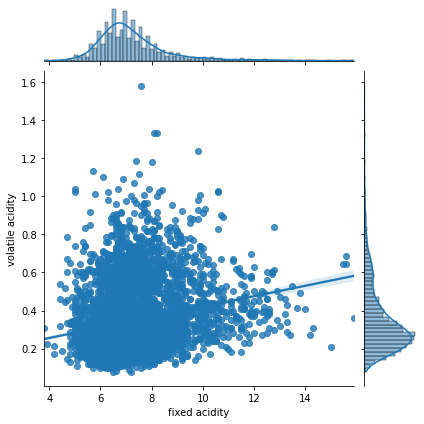

In [70]:
# 聯合圖
sns.jointplot(data=df_wine, x="fixed acidity", y="volatile acidity", kind = 'reg')

c:\users\meng-hsin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\meng-hsin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


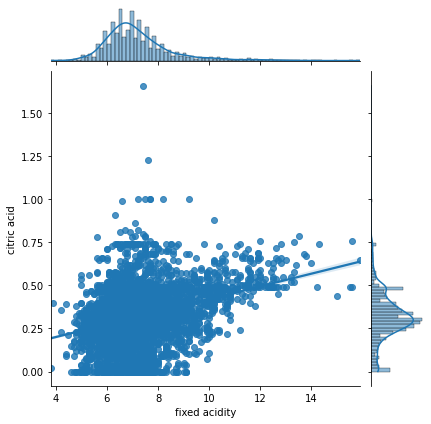

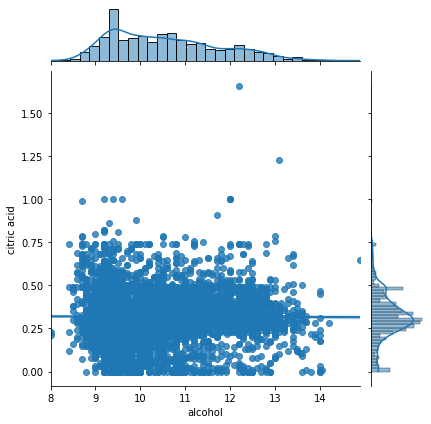

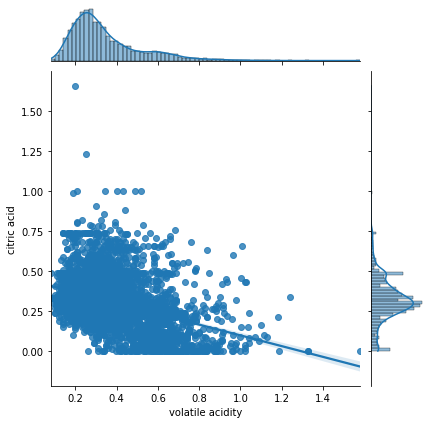

In [74]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot("fixed acidity","citric acid",data = df_wine,kind ='reg', color = None)
b = sns.jointplot("alcohol", "citric acid", data = df_wine, kind = 'reg')
c = sns.jointplot("volatile acidity", "citric acid", data = df_wine, kind = 'reg')

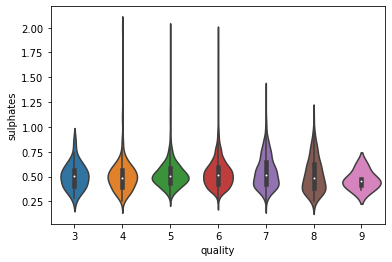

In [75]:
# 小提琴圖
ax = sns.violinplot(x="quality", y="sulphates", data=df_wine)